# Wikipedia Celebratity Page Similarity Calculation

### Import Dataset
- Wikipedia library need to be install for access the article. for Download package [click here](https://pypi.org/project/wikipedia/)

In [1]:
import wikipedia
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### Helping Function

- Helping function contain distance function which is used to calculate the distance between two articles

In [2]:
### helping function
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

### Celebratity List and Fetch Data of that celebraty from Wikipedia

- `temp` is list variable, where you have to pass the name in this list so we can fecth that name wikipedia article using `wikpedia.page(name)` and stored all data in dictionary format with title.

In [3]:
temp = ['Amitabh_bachchan','Salman_Khan','Shah_Rukh_Khan','Akshay_Kumar','Manoj_Kumar','Sunny_Deol']
data = {}
for i in temp:
    data[str(i)] = wikipedia.page(str(i)).content

### Generate Their Name and content List

* Differentiate the article name and its content and stored in the list format

In [4]:
Content = []
Name = []
for i in data.keys():
    Content.append(data[i])
    Name.append(i)

### Convert Article from word to number using CountVectorizer() Method

* The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

1. Create an instance of the `CountVectorizer` class.
2. Call the `fit()` function in order to learn a vocabulary from one or more documents.
3. Call the `transform()` function on one or more documents as needed to encode each as a vector.

In [5]:
cv = CountVectorizer()
X = np.array(cv.fit_transform(Content).todense())

### Generate their Pair and Distance List and Convert that into Dataframe

* In this part, We can prepare the pair and calculate its distance using Cosine and Euclidean Distance Method and try to generate plot.

No handles with labels found to put in legend.


,29,21,9,26,22,14,27,4,20,25
Pair,Sunny_Deol-Manoj_Kumar,Manoj_Kumar-Salman_Khan,Salman_Khan-Manoj_Kumar,Sunny_Deol-Salman_Khan,Manoj_Kumar-Shah_Rukh_Khan,Shah_Rukh_Khan-Manoj_Kumar,Sunny_Deol-Shah_Rukh_Khan,Amitabh_bachchan-Manoj_Kumar,Manoj_Kumar-Amitabh_bachchan,Sunny_Deol-Amitabh_bachchan
Distance,0.796007,0.798993,0.798993,0.808055,0.809481,0.809481,0.826828,0.827808,0.827808,0.841261


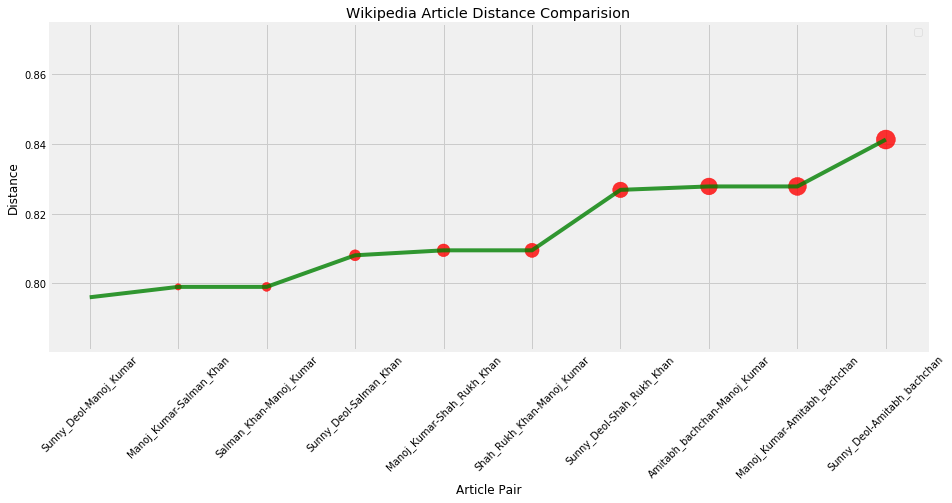

In [6]:
n = 10
pair = []
distance = []
for i in range(len(Content)):
    for j in range(len(Content)-1):
        pair.append(str(Name[i]+"-"+Name[j]))
        distance.append(cosine_similarity(X[i],X[j]))
df = pd.DataFrame()
df['Pair'] = pair
df['Distance'] = distance
df.sort_values(by="Distance", inplace = True)
plt.figure(figsize=(14,6))
s = [40*n for n in range(len(df['Distance'][:n]))]
plt.scatter(df['Pair'][:n],df['Distance'][:n], color="Red", marker="o", alpha=0.8, s=s)
plt.plot(df['Pair'][:n],df['Distance'][:n], color="green", alpha=0.8)
plt.xlabel('Article Pair')
plt.ylabel('Distance')
plt.title('Wikipedia Article Distance Comparision')
plt.legend()
plt.xticks(rotation=45)
df[df['Distance'] < 1][:n].T

Wrap All into function and add extra functionality
----

* Step 1: Generate the list **`temp`**
* Step 2: Download its list name all wikipedia article and store into dictionary **`df`**
* Step 3: Differentiate All name of article and its content in **`Content`** and **`Name`** variable
* Step 4: Convert **`Content`** Vector into Array(***It's convertion of Text to number Because Function only understand Numbers***)
* Step 5: Generate the **`pair`** list and **`Distance`** list by calculating Any one **distance(Cosine or Euclidean)**
* Step 6: Generate the table as per **Distance** and ***Sort the table by Distance and Return the Top n Minimum Distnace of Article Distance of Wikipedia***

----
Parameters
---
* **`n`** : contain number of minimum distance return  
* **`data`** : contain wikipedia name in list format  
* **`Dist_function`** : pass any one cosine_similarity or euclidean_distance  
* **`transpose`** : `True` value return table in horizontal format else normal  
* **`plot`**: `True` value draw the plot else return only table  

---


In [7]:
temp = ['Amitabh_bachchan','Salman_Khan','Shah_Rukh_Khan','Akshay_Kumar','Manoj_Kumar','Sunny_Deol']
cricket = ['Virat_Kohli','MS_Dhoni','Sachin_Tendulkar','Sourav_Ganguly','Rahul_Dravid']

In [8]:
def meenakshi_distance(n=5, data = temp, Dist_function = cosine_similarity, transpose=False, plot = False):
    '''
    The ``meenakshi_distance`` module
    ======================
    n : contain number of minimum distance return
    data : contain wikipedia name in list format
    Dist_function : pass any one cosine_similarity or euclidean_distance
    transpose : `True` value return table in horizontal format else normal
    plot: `True` value draw the plot else return only table
    '''
    ### Celebratity List and Fetch Data of that celebraty from Wikipedia
    df = {}
    for i in data:
        df[str(i)] = wikipedia.page(str(i)).content
        
    ### Generate Their Name and content List        
    Content = []
    Name = []
    for i in df.keys():
        Content.append(df[i])
        Name.append(i)
            
    ### Convert Article from word to number using CountVectorizer() Method
    cv = CountVectorizer()
    X = np.array(cv.fit_transform(Content).todense())
    
    ### Generate their Pair and Distance List and Convert that into Dataframe
    pair = []
    distance = []
    for i in range(len(Content)):
        for j in range(len(Content)-1):
            pair.append(str(Name[i]+"-"+Name[j]))
            distance.append(Dist_function(X[i],X[j]))
    dt = pd.DataFrame()
    dt['Pair'] = pair
    dt['Distance'] = distance
    dt.sort_values(by="Distance", inplace = True)

    ### Plot the graph
    if plot:
        if Dist_function == cosine_similarity:
            plt.figure(figsize=(14,6))
            s = [50*n for n in range(len(dt[dt['Distance'] < 1]['Distance'][:n]))]
            plt.scatter(dt[dt['Distance'] < 1]['Pair'][:n],dt[dt['Distance'] < 1]['Distance'][:n], color="Red", marker="o", alpha=0.8, s=s)
            plt.plot(dt[dt['Distance'] < 1]['Pair'][:n],dt[dt['Distance'] < 1]['Distance'][:n], color="green", alpha=0.8)
            plt.xlabel('Article Pair')
            plt.ylabel('Distance')
            plt.title('Wikipedia Article Cosine Distance Comparision')
            plt.xticks(rotation=45)
            plt.show()
        else:
            plt.figure(figsize=(14,6))
            s = [50*n for n in range(len(dt[dt['Distance'] > 0]['Distance'][:n]))]
            plt.scatter(dt[dt['Distance'] > 0]['Pair'][:n],dt[dt['Distance'] > 0]['Distance'][:n], color="Red", marker="o", alpha=0.8, s=s)
            plt.plot(dt[dt['Distance'] > 0]['Pair'][:n],dt[dt['Distance'] > 0]['Distance'][:n], color="green", alpha=0.8)
            plt.xlabel('Article Pair')
            plt.ylabel('Distance')
            plt.title('Wikipedia Article Euclidean Distance Comparision')
            plt.xticks(rotation=45)
            plt.show()

    ### if Transpose true show result horizontly else normal
    print("Top {} Minimum Distance".format(n))
    if Dist_function == cosine_similarity:
        if transpose:
            return dt[dt['Distance'] < 1][:n].T
        else:
            return dt[dt['Distance'] < 1][:n]
    else:
        if transpose:
            return dt[dt['Distance'] > 1][:n].T
        else:
            return dt[dt['Distance'] > 1][:n]


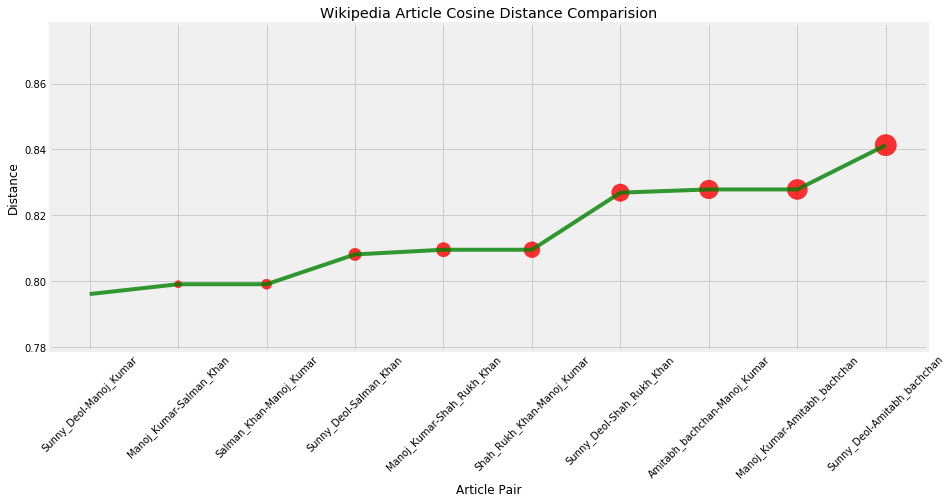

Top 10 Minimum Distance


,29,21,9,26,22,14,27,4,20,25
Pair,Sunny_Deol-Manoj_Kumar,Manoj_Kumar-Salman_Khan,Salman_Khan-Manoj_Kumar,Sunny_Deol-Salman_Khan,Manoj_Kumar-Shah_Rukh_Khan,Shah_Rukh_Khan-Manoj_Kumar,Sunny_Deol-Shah_Rukh_Khan,Amitabh_bachchan-Manoj_Kumar,Manoj_Kumar-Amitabh_bachchan,Sunny_Deol-Amitabh_bachchan
Distance,0.796007,0.798993,0.798993,0.808055,0.809481,0.809481,0.826828,0.827808,0.827808,0.841261


In [9]:
meenakshi_distance(n = 10, data = temp,transpose=True, Dist_function=cosine_similarity, plot=True)